In [605]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing, utils
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.compose import ColumnTransformer

In [606]:
# dataset https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset/code
#1) gender: "Male", "Female" or "Other"
#2) age: age of the patient
#3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
#4) heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
#5) evermarried: "No" or "Yes"
#6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 
#7) Residencetype: "Rural" or "Urban"
#8) avgglucoselevel: average glucose level in blood
#9) bmi: body mass index
#10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
#11) stroke: 1 if the patient had a stroke or 0 if not

In [607]:
df_raw = pd.read_csv(r'C:\Users\faron\OneDrive\Pulpit\ml projekt\full_data.csv')

In [608]:
df_raw.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [609]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [610]:
# we need to check if there are any missing values
df_raw.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

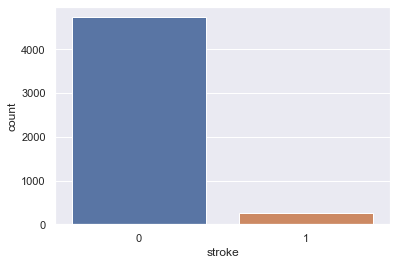

In [611]:
##let's now perform data analysis
sns.countplot(data=df_raw,x='stroke')

In [612]:
# we can see that there is substantial imbalance in our dataset, it might cause problems when we will be creating models
df_raw['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

C:\Users\faron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\faron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\faron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\faron\anaconda3\lib\si

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

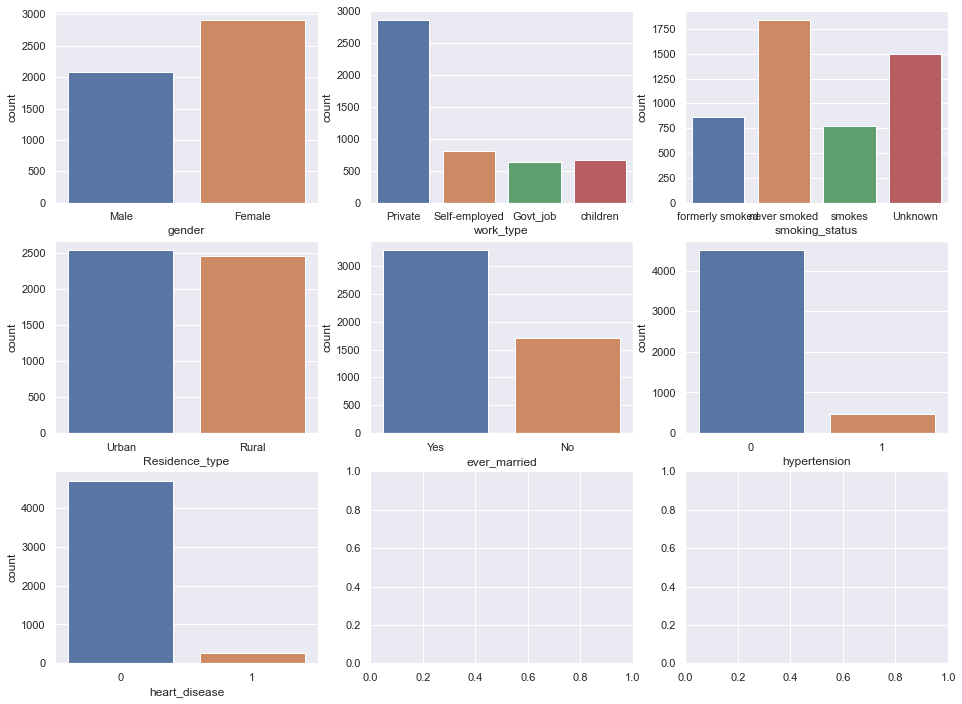

In [613]:
fig, ax = plt.subplots(3,3, figsize=(16, 12))
sns.countplot(df_raw['gender'], ax=ax[0,0])
sns.countplot(df_raw['work_type'], ax=ax[0,1])
sns.countplot(df_raw['smoking_status'], ax=ax[0,2])
sns.countplot(df_raw['Residence_type'], ax=ax[1,0])
sns.countplot(df_raw['ever_married'], ax=ax[1,1])
sns.countplot(df_raw['hypertension'], ax=ax[1,2])
sns.countplot(df_raw['heart_disease'], ax=ax[2,0])

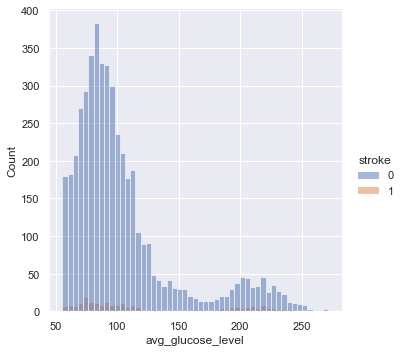

In [614]:
sns.displot(data=df_raw, x='avg_glucose_level', hue='stroke')

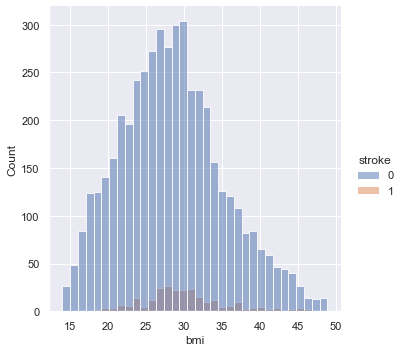

In [615]:
sns.displot(data=df_raw, x='bmi', hue='stroke')

In [616]:
# since we have object type data we need to create dummies to continue 
gender_d = pd.get_dummies(df_raw['gender'])
ever_married_d = pd.get_dummies(df_raw['ever_married'])
work_type_d = pd.get_dummies(df_raw['work_type'])
Residence_type_d = pd.get_dummies(df_raw['Residence_type'])
smoking_status_d = pd.get_dummies(df_raw['smoking_status'])

In [617]:
df_semiraw = pd.concat([df_raw, gender_d, ever_married_d, work_type_d, Residence_type_d, smoking_status_d],axis=1)

In [618]:
df = df_semiraw.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)

In [619]:
# we need to drop columns which could cause multicollinearity

In [620]:
df.drop(['Rural','No','Male','Unknown'], axis=1, inplace = True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Yes,Govt_job,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,1,0,1,0,0,1,0,0,1
3,79.0,1,0,174.12,24.0,1,1,1,0,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1,1,0,0


In [621]:
# lets normalize our data before we start creating models

In [622]:
cols_to_scale = ['age','avg_glucose_level','bmi']
scaler = StandardScaler()
scaler.fit(df[cols_to_scale])
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [623]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Yes,Govt_job,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,1.040584,0,1,2.723411,1.193238,1,0,1,0,1,0,0,1,1,0,0
1,1.614270,0,1,-0.000523,0.589390,1,0,1,0,1,0,0,0,0,1,0
2,0.246250,0,0,1.448529,0.869222,1,1,1,0,1,0,0,1,0,0,1
3,1.570141,1,0,1.512650,-0.662492,1,1,1,0,0,1,0,0,0,1,0
4,1.658400,0,0,1.780895,0.073909,1,0,1,0,1,0,0,1,1,0,0


<AxesSubplot:>

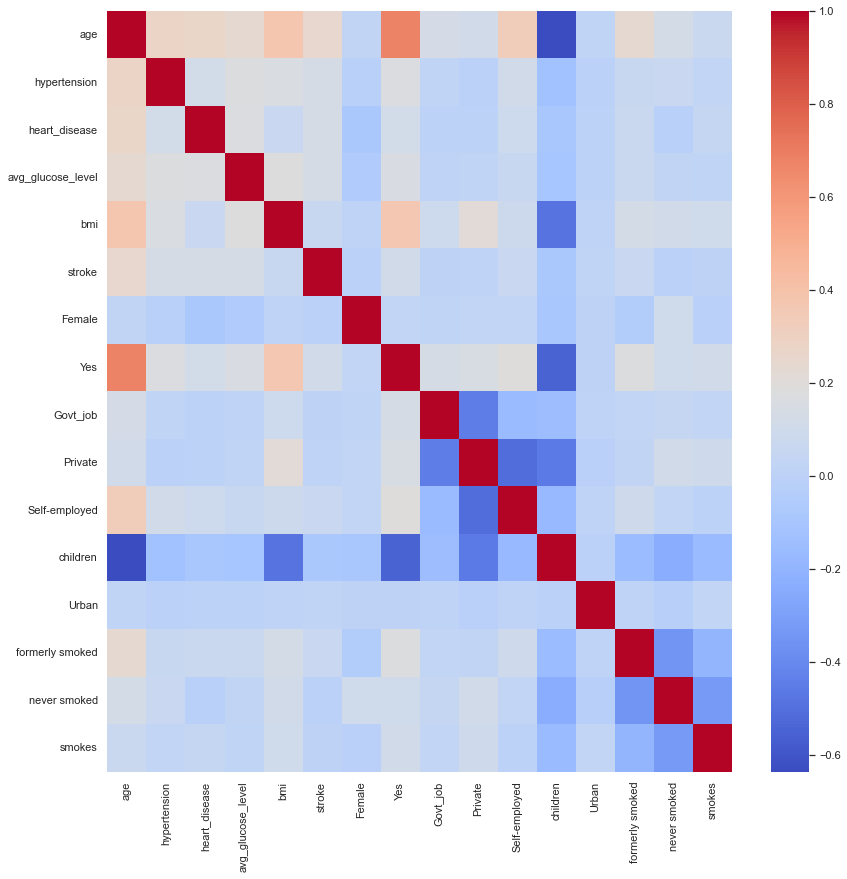

In [624]:
# now let's check how correlated our data is
corr = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cmap= 'coolwarm')

In [625]:
# now we move to creating models on our data
X = df.drop('stroke',axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [626]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[1419    3]
 [  71    2]]


In [627]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train,y_train)
log_pred = log.predict(X_test)
print(confusion_matrix(y_test,log_pred))

[[1421    1]
 [  73    0]]


In [628]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
gauss_pred = gauss.predict(X_test)
print(confusion_matrix(y_test,gauss_pred))

[[1203  219]
 [  33   40]]


In [629]:
knn = KNeighborsClassifier(n_neighbors= 20)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))

[[1422    0]
 [  73    0]]


Text(0, 0.5, 'Error Rate')

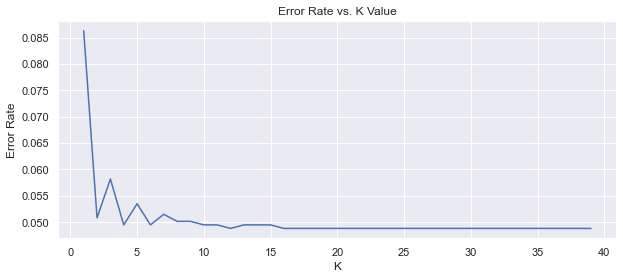

In [630]:
# we can check if changing number of neighbours will make our model better
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,4))
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [631]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(confusion_matrix(y_test,svc_pred))

[[1422    0]
 [  73    0]]


In [632]:
# all of our models are bad at predictig cases when patient actually had stroke, we need to modify our data in order to improve
# them

In [633]:
# we will try using smote first

In [634]:
smote = SMOTEENN()
X_smote,y_smote = smote.fit_resample(X,y)
X_train_smote, X_test_smote ,y_train_smote , y_test_smote = train_test_split(X_smote,y_smote,test_size=0.3)

In [635]:
rfc_smote = RandomForestClassifier(n_estimators=200)
rfc_smote.fit(X_train_smote, y_train_smote)
rfc_pred_smote = rfc_smote.predict(X_test)
print(confusion_matrix(y_test, rfc_pred_smote))

[[1237  185]
 [   1   72]]


In [636]:
## results are not the best, now let's try using another model

In [637]:
log_smote = LogisticRegression(max_iter=1000)
log_smote.fit(X_train_smote,y_train_smote)
log_pred_smote = log_smote.predict(X_test)
print(confusion_matrix(y_test,log_pred_smote))

[[997 425]
 [ 11  62]]


In [638]:
## smote turned out not to be the best either, let's move to oversampling

In [639]:
oversamp = RandomOverSampler(random_state=1)
X_o, y_o = oversamp.fit_resample(X, y)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=0.3)

In [657]:
rfc_o = RandomForestClassifier(n_estimators=200)
rfc_o.fit(X_train_o, y_train_o)
rfc_pred_o = rfc_o.predict(X_test)
print(metrics.accuracy_score(y_test,rfc_pred_o))
print()
print(confusion_matrix(y_test,rfc_pred_o))
print()
print(classification_report(y_test,rfc_pred_o))

0.9946488294314382

[[1414    8]
 [   0   73]]

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1422
           1       0.90      1.00      0.95        73

    accuracy                           0.99      1495
   macro avg       0.95      1.00      0.97      1495
weighted avg       1.00      0.99      0.99      1495



In [641]:
log_o = LogisticRegression(max_iter=10000)
log_o.fit(X_train_o,y_train_o)
log_pred_o = log_o.predict(X_test)
print(confusion_matrix(y_test,log_pred_o))

[[1024  398]
 [  11   62]]


In [642]:
gauss_o = GaussianNB()
gauss_o.fit(X_train_o, y_train_o)
gauss_pred_o = gauss_o.predict(X_test)
print(confusion_matrix(y_test,gauss_pred_o))

[[847 575]
 [  4  69]]


In [643]:
knn_o = KNeighborsClassifier(n_neighbors= 20)
knn_o.fit(X_train_o,y_train_o)
knn_pred_o = knn_o.predict(X_test)
print(confusion_matrix(y_test,knn_pred_o))

[[998 424]
 [  7  66]]


In [644]:
svc_o = SVC()
svc_o.fit(X_train_o,y_train_o)
svc_pred_o = svc_o.predict(X_test)
print(confusion_matrix(y_test,svc_pred_o))

[[1103  319]
 [   6   67]]


In [645]:
## we clearly see that rfc model is currently the best 
## now let's try random undersampling

In [646]:
undersamp = RandomUnderSampler(random_state=1)
X_u, y_u = undersamp.fit_resample(X, y)
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_u, y_u, test_size=0.3)

In [647]:
rfc_u = RandomForestClassifier(n_estimators=200)
rfc_u.fit(X_train_u, y_train_u)
rfc_pred_u = rfc_u.predict(X_test)
print(confusion_matrix(y_test,rfc_pred_u))

[[995 427]
 [  4  69]]


In [648]:
## this model is much worse then the rfc one where we used oversampled data, let's now see this model features importance

In [649]:
regressor = RandomForestRegressor(n_estimators=200) 
regressor.fit(X_train_o, y_train_o) 
df_for_class = df.drop(['stroke'], axis = 1)
columns = df_for_class.columns
feature_imp = pd.Series(regressor.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

age                  0.460919
avg_glucose_level    0.213302
bmi                  0.178763
never smoked         0.020959
Female               0.016113
hypertension         0.015118
Urban                0.014772
heart_disease        0.013132
Self-employed        0.012351
Private              0.011871
formerly smoked      0.011641
smokes               0.011386
Yes                  0.010097
Govt_job             0.009576
children             0.000000
dtype: float64

In [650]:
# let's plot them

<AxesSubplot:xlabel='feature', ylabel='importance'>

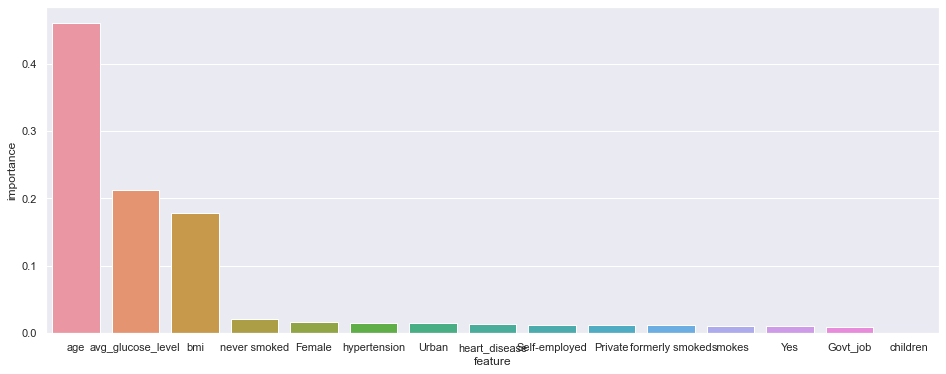

In [651]:
df_feature = pd.DataFrame(feature_imp)
df_feature.reset_index(inplace=True)
df_feature.columns = ['feature', 'importance']
sns.set(rc = {'figure.figsize':(16,6)})
sns.barplot(data=df_feature, x='feature', y='importance')

In [652]:
param_grid = {
    'n_estimators': [50, 200, 500],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,None],
    'criterion' :['gini', 'entropy']
}

In [653]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_o, y_train_o)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [50, 200, 500]})

In [654]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [658]:
rfc_final=RandomForestClassifier(max_features='sqrt', n_estimators= 200, max_depth=None, criterion='gini')
rfc_final.fit(X_train_o, y_train_o)
rfc_final_pred = rfc_final.predict(X_test)
print(metrics.accuracy_score(y_test,rfc_final_pred))
print()
print(confusion_matrix(y_test,rfc_final_pred))
print()
print(classification_report(y_test,rfc_final_pred))

0.9953177257525083

[[1415    7]
 [   0   73]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1422
           1       0.91      1.00      0.95        73

    accuracy                           1.00      1495
   macro avg       0.96      1.00      0.98      1495
weighted avg       1.00      1.00      1.00      1495



In [656]:
#our final model has a bit better scores than the one we created earlier